In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-51k-records/Customer Segmentation.csv


## Expolaratory Data Analysis

### Importing Related Resources

In [6]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
import missingno as msno

Uploading and Reading Dataset 

In [8]:
file ='/kaggle/input/customer-segmentation-51k-records/Customer Segmentation.csv'
df = pd.read_csv(file)

Checking it properly load or not.

In [9]:
df.head()

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.473886,24.295514,...,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.838304,-80.648215,...,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.424052,-79.242648,...,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,...,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.074088,104.449040,...,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57


In [10]:
df.tail()

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
50995,Madeleine,Beales,Mrs,Female,mbealesrn@dagondesign.com,Point Hill,Jamaica,JM,18.090238,-77.109170,...,500,Trail,America/Jamaica,Flashpoint,Marketing,Pharmacist,Dhivehi,"University of the West Indies, Mona",Capital Equipment,194.87.138.177
50996,Tiena,Linfoot,Mrs,Female,tlinfootro@reddit.com,Jiesheng,China,CN,22.713664,115.458167,...,5983,Trail,Asia/Shanghai,Skajo,Services,Graphic Designer,Arabic,Hubei University,PE,218.8.15.234
50997,Warren,Skeggs,Mr,Male,wskeggsrp@who.int,El Copey,Colombia,CO,10.148976,-73.960233,...,47,Parkway,America/Bogota,Mybuzz,Accounting,VP Sales,Kyrgyz,Conservatorio del Tolima,BPWin,94.174.254.81
50998,Collette,Aspy,Dr,Polygender,caspyrq@weather.com,Xiaping,China,CN,27.568278,117.562238,...,334,Parkway,Asia/Shanghai,Eire,Legal,Assistant Media Planner,Amharic,China Agriculture University East,Aquariums,239.103.209.178
50999,Joscelin,Veschi,Mrs,Female,jveschirr@sogou.com,Xinglong,China,CN,40.417358,117.500558,...,8,Pass,Asia/Harbin,Edgeclub,Marketing,Marketing Manager,Bulgarian,Jishou University,GL,192.86.28.139


Shape of dataset

In [11]:
df.shape

(51000, 23)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_name      51000 non-null  object 
 1   last_name       51000 non-null  object 
 2   title           51000 non-null  object 
 3   gender          51000 non-null  object 
 4   email           51000 non-null  object 
 5   city            51000 non-null  object 
 6   country         51000 non-null  object 
 7   country_code    50966 non-null  object 
 8   latitude        51000 non-null  float64
 9   longitude       51000 non-null  float64
 10  phone           51000 non-null  object 
 11  street_address  51000 non-null  object 
 12  street_name     51000 non-null  object 
 13  street_number   51000 non-null  int64  
 14  street_suffix   51000 non-null  object 
 15  time_zone       51000 non-null  object 
 16  company_name    51000 non-null  object 
 17  department      51000 non-null 

In [13]:
df.columns

Index(['first_name', 'last_name', 'title', 'gender', 'email', 'city',
       'country', 'country_code', 'latitude', 'longitude', 'phone',
       'street_address', 'street_name', 'street_number', 'street_suffix',
       'time_zone', 'company_name', 'department', 'job_title', 'language',
       'university', 'linkedin_skill', 'ip_address'],
      dtype='object')

In [14]:
data = df[['first_name', 'last_name','gender', 'email','city',
       'country','time_zone', 'company_name', 'department', 'job_title', 'language',
       'university', 'linkedin_skill']]

extracting useful features from existing dataframe

In [15]:
data.head()

,first_name,last_name,gender,email,city,country,time_zone,company_name,department,job_title,language,university,linkedin_skill
0,Priscella,Pollett,Agender,ppollett0@foxnews.com,Sesheke,Zambia,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle
1,Ana,Onge,Male,aonge1@fda.gov,Querecotillo,Peru,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry
2,Butch,Rawls,Male,brawls2@slideshare.net,Licupis,Peru,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN
3,Ambros,Fairrie,Male,afairrie3@reuters.com,Yonghe,China,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication
4,Gaylene,Titcomb,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL


In [16]:
data.isnull().sum()

first_name        0
last_name         0
gender            0
email             0
city              0
country           0
time_zone         0
company_name      0
department        0
job_title         0
language          0
university        0
linkedin_skill    0
dtype: int64

<AxesSubplot:>

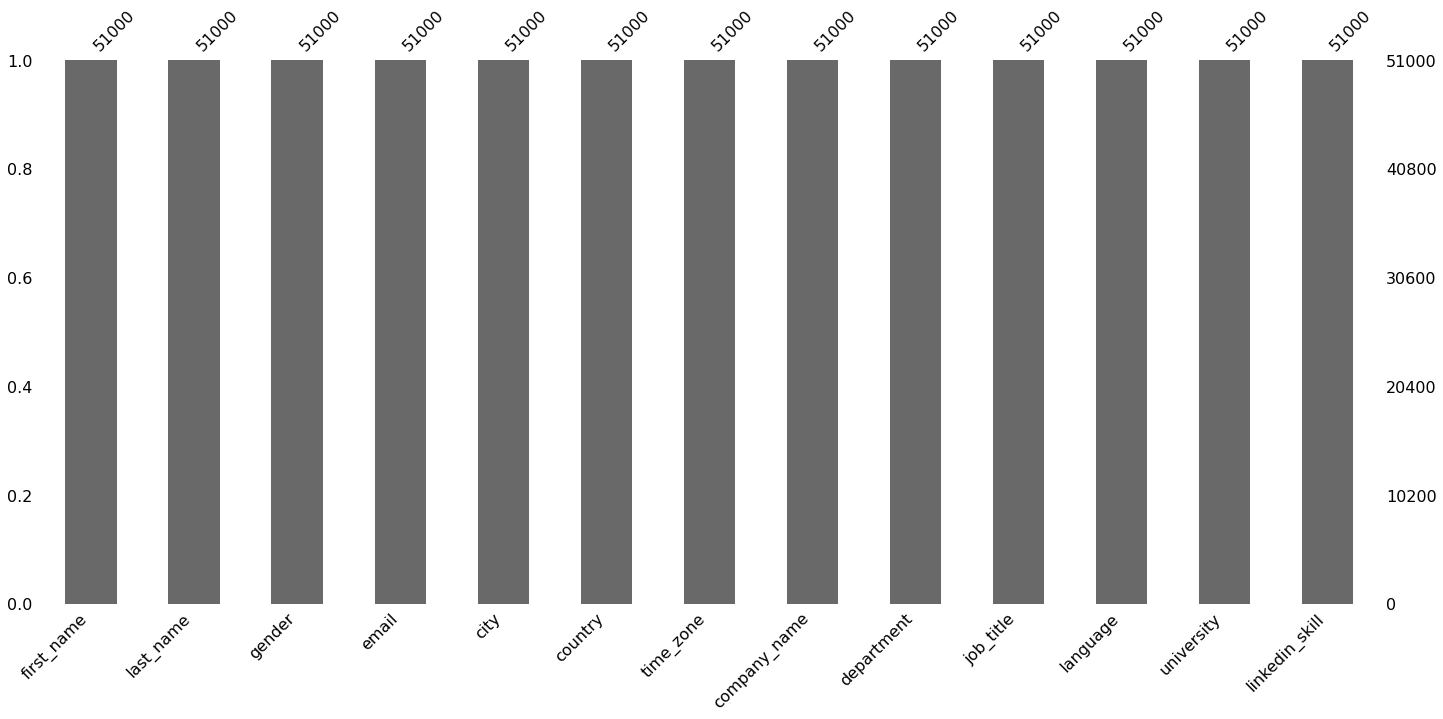

In [17]:
msno.bar(data)#checking missing value

Observation

-----------------------------------------


There is no missing value in dataset.

In [18]:
data.dtypes.value_counts()#checking various type of category in dataset.

object    13
dtype: int64

Observation

-----------------------------------------

1. There is no numarical type of data in our dataset.

In [19]:
data.info()# further inspecting each feature dtype correctly assign or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   first_name      51000 non-null  object
 1   last_name       51000 non-null  object
 2   gender          51000 non-null  object
 3   email           51000 non-null  object
 4   city            51000 non-null  object
 5   country         51000 non-null  object
 6   time_zone       51000 non-null  object
 7   company_name    51000 non-null  object
 8   department      51000 non-null  object
 9   job_title       51000 non-null  object
 10  language        51000 non-null  object
 11  university      51000 non-null  object
 12  linkedin_skill  51000 non-null  object
dtypes: object(13)
memory usage: 5.1+ MB


### Changing dtype

In [20]:
data = data.astype({"gender":'category',"department":'category',"job_title":'category',"language":'category',"linkedin_skill":'category'})

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   first_name      51000 non-null  object  
 1   last_name       51000 non-null  object  
 2   gender          51000 non-null  category
 3   email           51000 non-null  object  
 4   city            51000 non-null  object  
 5   country         51000 non-null  object  
 6   time_zone       51000 non-null  object  
 7   company_name    51000 non-null  object  
 8   department      51000 non-null  category
 9   job_title       51000 non-null  category
 10  language        51000 non-null  category
 11  university      51000 non-null  object  
 12  linkedin_skill  51000 non-null  category
dtypes: category(5), object(8)
memory usage: 3.6+ MB


### Making new features

In [22]:
data['name']=data['first_name'].str.cat(data['last_name'],sep=" ") # merging first and last name , no need of two seprate column for this.

In [23]:
s = data['time_zone'].str.split('/') # spliting time_zone into continent and time_zone.
data = data.assign(continent=s.str[0], timezone=s.str[1])

### Removing unnecessary column

In [24]:
data = data.drop(['first_name', 'last_name','time_zone', 'timezone'],axis=1)

### Renaming some column

In [25]:
data = data.rename(columns={'company_name': 'company', 'job_title': 'job','linkedin_skill':'skill'})

## Information about the schema

In [26]:
data.describe()

,gender,email,city,country,company,department,job,language,university,skill,name,continent
count,51000,51000,51000,51000,51000,51000,51000,51000,51000,51000,51000,51000
unique,8,51000,24921,235,383,12,195,97,6633,5976,50995,9
top,Male,ppollett0@foxnews.com,Stockholm,China,Youspan,Business Development,Analyst Programmer,Tetum,Pyongyang University of Science and Technology,Hand-drawn Typography,Walker Powdrill,Asia
freq,22918,1,100,9343,283,4327,502,597,99,20,2,24168


In [33]:
data.nunique()

gender            8
email         51000
city          24921
country         235
company         383
department       12
job             195
language         97
university     6633
skill          5976
name          50995
continent         9
dtype: int64

### Inspecting each varriable

Text(0, 0.5, 'department')

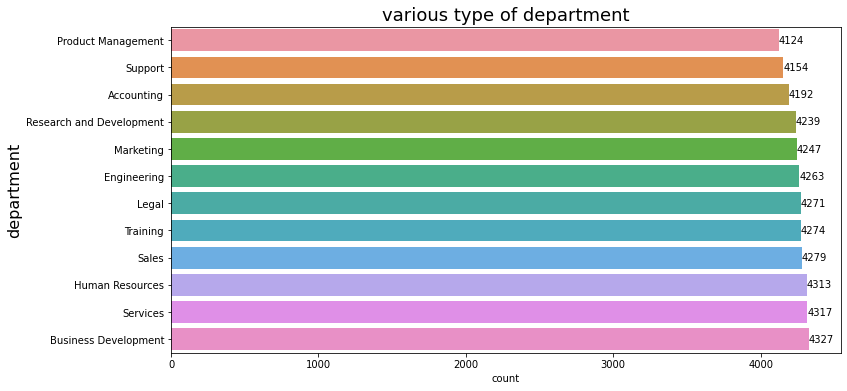

In [28]:
plt.figure(figsize=(12, 6))
department = data['department']
ax=sns.countplot(y= department ,data =data,orient='h',order=department.value_counts().sort_values().index)
plt.title('various type of department', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('department', fontsize=16)


Observation

-----------------------------------------------------------

1. Proportion of every department is somewhat simmilar in dataset.

Text(0, 0.5, 'Gender')

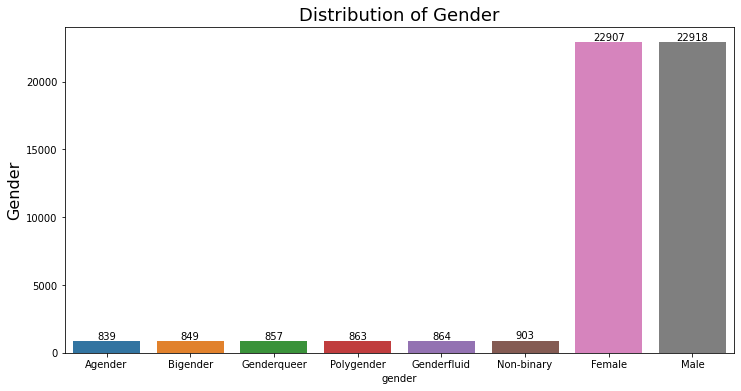

In [29]:
plt.figure(figsize=(12, 6))
sex = data['gender']
ax=sns.countplot(x= sex ,data =data,orient='v',order=sex.value_counts().sort_values().index)
plt.title('Distribution of Gender', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('Gender', fontsize=16)

Observation

-----------------------------------------------------------

1. Male and Female gender is more in number.
2. proprtion of male and female is appreox same.
3. Show diversity in our dataset.

Text(0, 0.5, 'continent')

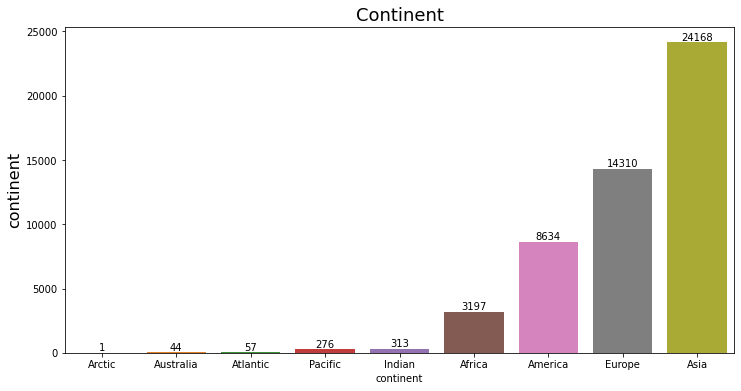

In [30]:
plt.figure(figsize=(12, 6))
continent = data['continent']
ax=sns.countplot(x= continent ,data =data,orient='v',order=continent.value_counts().sort_values().index)
plt.title('Continent', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('continent', fontsize=16)

Observation
-------------------------------------------------

1. Asia is dominating.
2. India as sub_continent. 

In [31]:
import squarify # pip install squarify

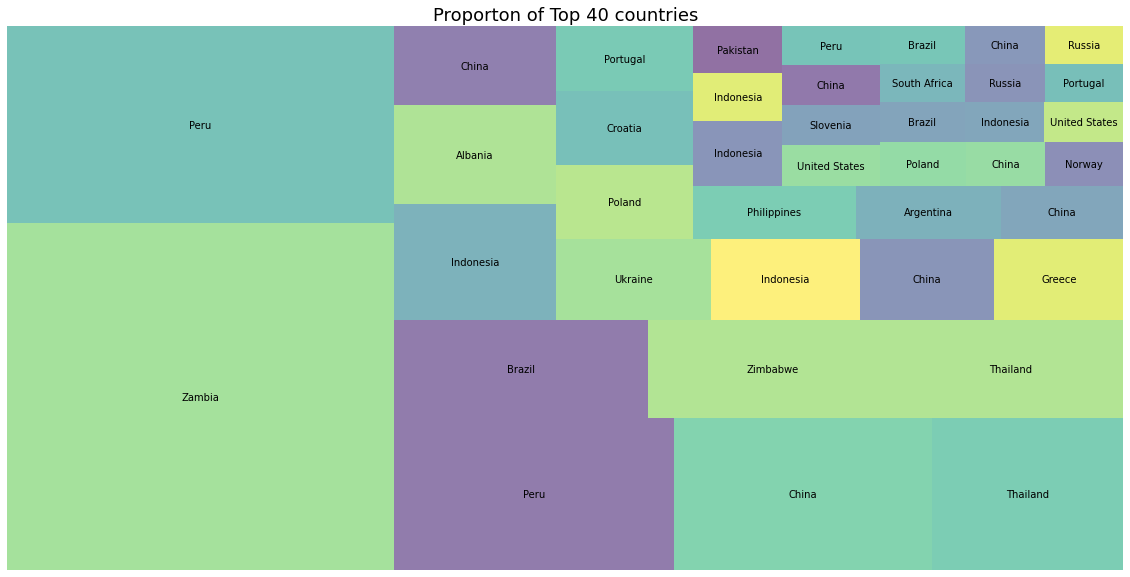

In [34]:
plt.figure(figsize=(20, 10))
sizes = data['country'].value_counts()[:40]
squarify.plot(sizes=sizes, label=data['country'], alpha=0.6)
plt.title('Proporton of Top 40 countries', fontsize=18)
plt.axis('off')
plt.show()


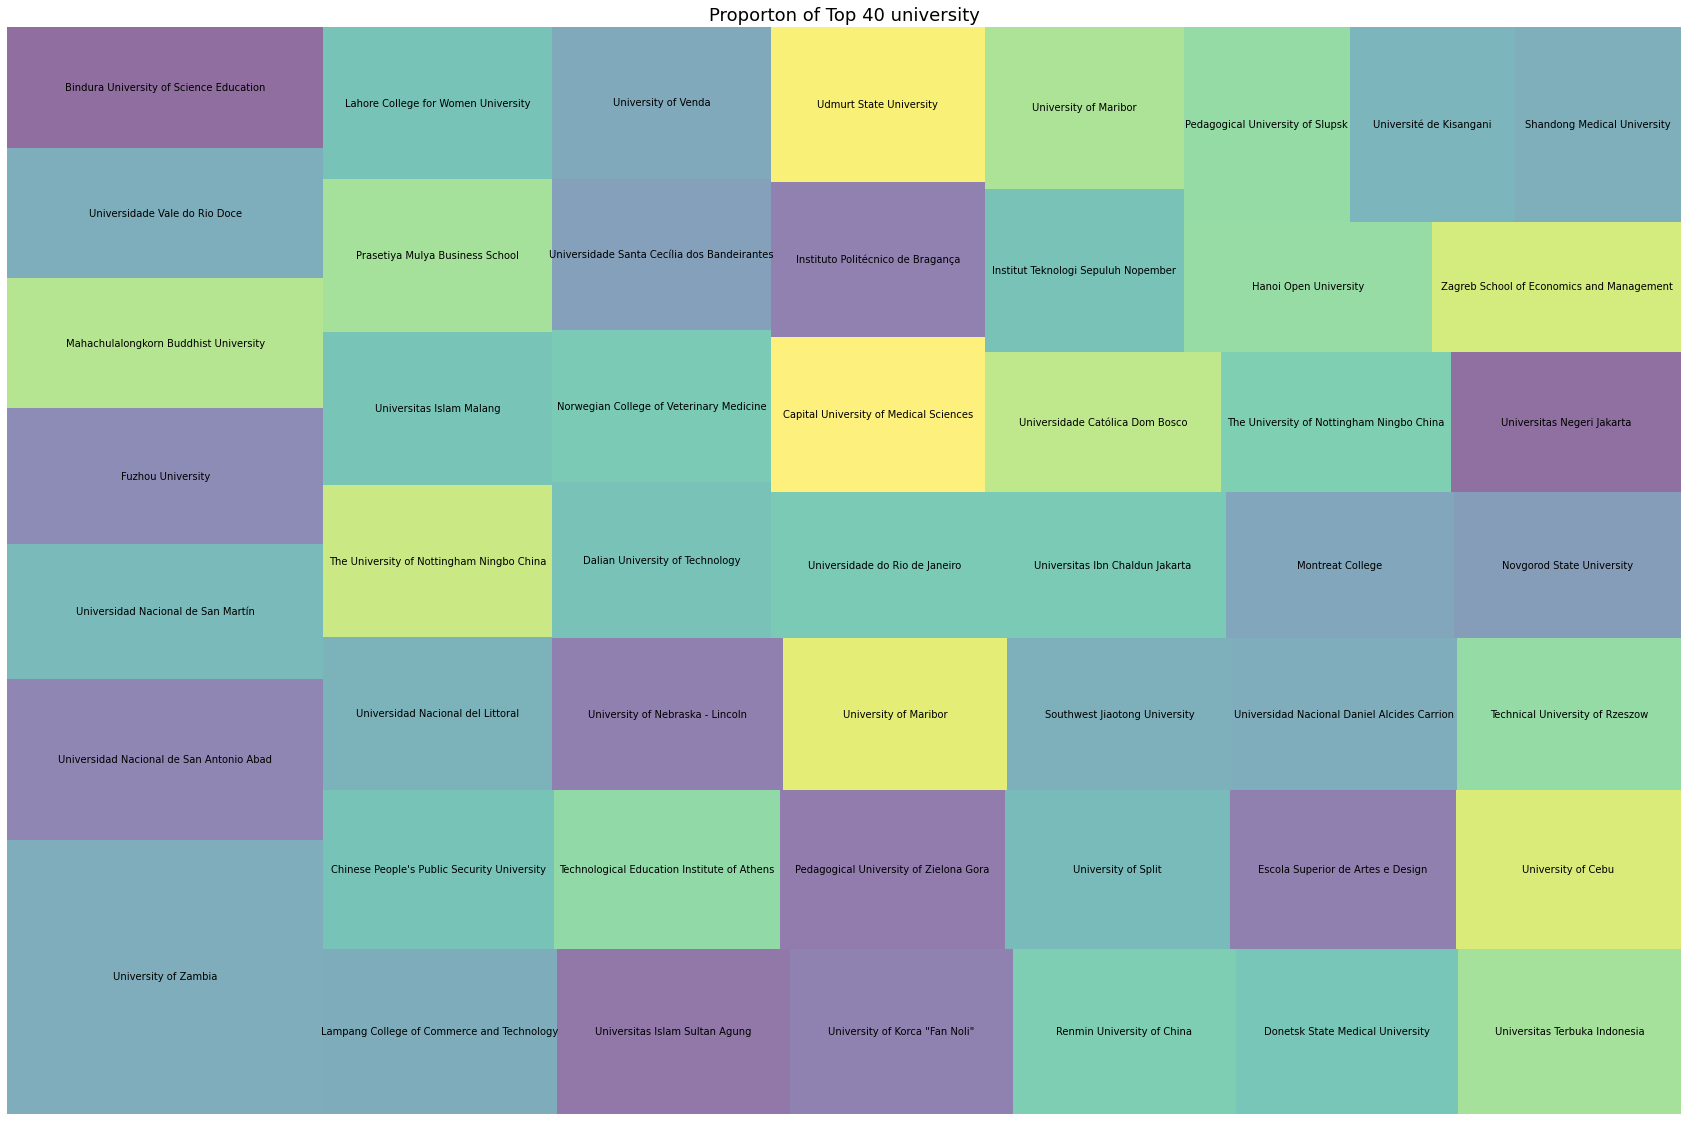

In [40]:
plt.figure(figsize=(30, 20))
sizes = data['university'].value_counts()[:50]
squarify.plot(sizes=sizes, label=data['university'], alpha=0.6)
plt.title('Proporton of Top 40 university', fontsize=18)
plt.axis('off')
plt.show()

In [44]:
data.nunique()

gender            8
email         51000
city          24921
country         235
company         383
department       12
job             195
language         97
university     6633
skill          5976
name          50995
continent         9
dtype: int64

In [56]:
data.columns

Index(['gender', 'email', 'city', 'country', 'company', 'department', 'job',
       'language', 'university', 'skill', 'name', 'continent'],
      dtype='object')

In [76]:
data.groupby('continent')['job'].count()


continent
Africa        3197
America       8634
Arctic           1
Asia         24168
Atlantic        57
Australia       44
Europe       14310
Indian         313
Pacific        276
Name: job, dtype: int64

In [79]:
data.groupby('gender')['continent'].max()

gender
Agender        Pacific
Bigender       Pacific
Female         Pacific
Genderfluid    Pacific
Genderqueer    Pacific
Male           Pacific
Non-binary     Pacific
Polygender     Pacific
Name: continent, dtype: object

In [80]:
india = data[data.continent == 'Indian']

In [120]:
ind = data[data.country == 'India']

In [123]:
china = data[data.country == 'China']

In [125]:
china.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9343 entries, 3 to 50999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gender      9343 non-null   category
 1   email       9343 non-null   object  
 2   city        9343 non-null   object  
 3   country     9343 non-null   object  
 4   company     9343 non-null   object  
 5   department  9343 non-null   category
 6   job         9343 non-null   category
 7   language    9343 non-null   category
 8   university  9343 non-null   object  
 9   skill       9343 non-null   category
 10  name        9343 non-null   object  
 11  continent   9343 non-null   object  
dtypes: category(5), object(7)
memory usage: 832.7+ KB


In [88]:
india.head(10)

,gender,email,city,country,company,department,job,language,university,skill,name,continent
399,Male,pbolverb3@ameblo.jp,Ifanadiana,Madagascar,Dabshots,Accounting,Data Coordiator,Belarusian,Université de Fianarantsoa,IKB,Park Bolver,Indian
456,Male,sfiveyco@github.com,Mramani,Comoros,Topiczoom,Engineering,Senior Quality Engineer,Portuguese,Universidad Isaac Newton,DDR,Saul Fivey,Indian
474,Female,dmcinultyd6@yellowbook.com,Tsaratanana,Madagascar,Linklinks,Accounting,Research Assistant III,Malagasy,Université de Toliary,Yearbook,Daune McInulty,Indian
641,Male,lhickinbottomht@unc.edu,Saint Pierre,Mauritius,Kazu,Accounting,Pharmacist,Kurdish,University of Mauritius,Tds,Laureen Hickinbottom,Indian
1197,Male,ltebbe5h@gmpg.org,Goodlands,Mauritius,Camimbo,Marketing,General Manager,Quechua,University of Technology,OSHA Instruction,Lemar Tebbe,Indian
1306,Genderqueer,bmolen8i@instagram.com,Belo sur Tsiribihina,Madagascar,Agivu,Business Development,Nuclear Power Engineer,Marathi,Université de Toliary,NVQs,Blakeley Molen,Indian
1380,Male,csylvaineak@smugmug.com,Ambanja,Madagascar,Fiveclub,Training,Nuclear Power Engineer,Macedonian,Université de Fianarantsoa,Class III Medical Devices,Car Sylvaine,Indian
1543,Male,cslimingsf3@hc360.com,Ecroignard,Mauritius,Jayo,Marketing,Graphic Designer,Japanese,University of Mauritius,Ideas Development,Crichton Slimings,Indian
1621,Female,openhalurickh9@google.fr,Grand Sable,Mauritius,Mynte,Product Management,Librarian,Hebrew,University of Mauritius,Motivational Speaking,Orella Penhalurick,Indian
1862,Male,mshotboulteny@shareasale.com,Alarobia,Madagascar,Oloo,Training,Data Coordiator,Hebrew,Université de Fianarantsoa,Electrical Engineering,Melita Shotboulte,Indian


In [82]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 399 to 50761
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gender      313 non-null    category
 1   email       313 non-null    object  
 2   city        313 non-null    object  
 3   country     313 non-null    object  
 4   company     313 non-null    object  
 5   department  313 non-null    category
 6   job         313 non-null    category
 7   language    313 non-null    category
 8   university  313 non-null    object  
 9   skill       313 non-null    category
 10  name        313 non-null    object  
 11  continent   313 non-null    object  
dtypes: category(5), object(7)
memory usage: 206.6+ KB


In [116]:
india.nunique()

gender          8
email         313
city          159
country        10
company       214
department     12
job           137
language       91
university     89
skill         308
name          313
continent       1
dtype: int64

Text(0, 0.5, 'country')

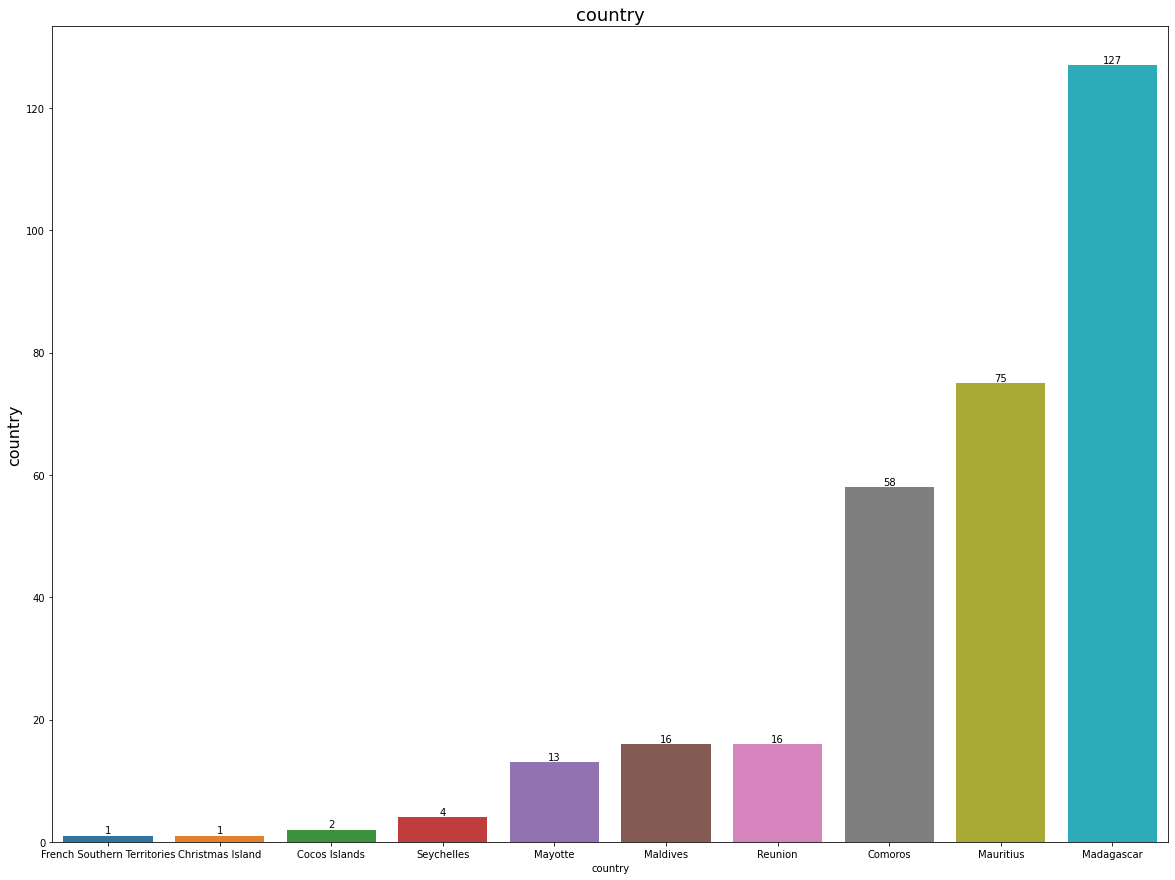

In [119]:
plt.figure(figsize=(20, 15))
country = india['country']
ax=sns.countplot(x= country ,data =india,orient='v',order=country.value_counts().sort_values().index)
plt.title('country', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('country', fontsize=16)

Text(0, 0.5, 'Gender')

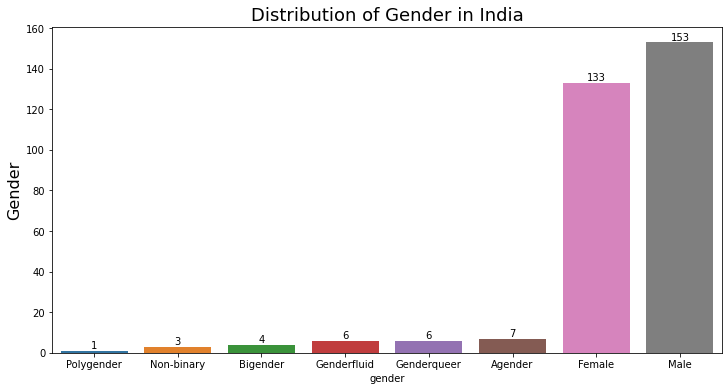

In [83]:
plt.figure(figsize=(12, 6))
sex1 = india['gender']
ax=sns.countplot(x= sex1 ,data =india,orient='v',order=sex1.value_counts().sort_values().index)
plt.title('Distribution of Gender in India', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('Gender', fontsize=16)

Text(0, 0.5, 'department')

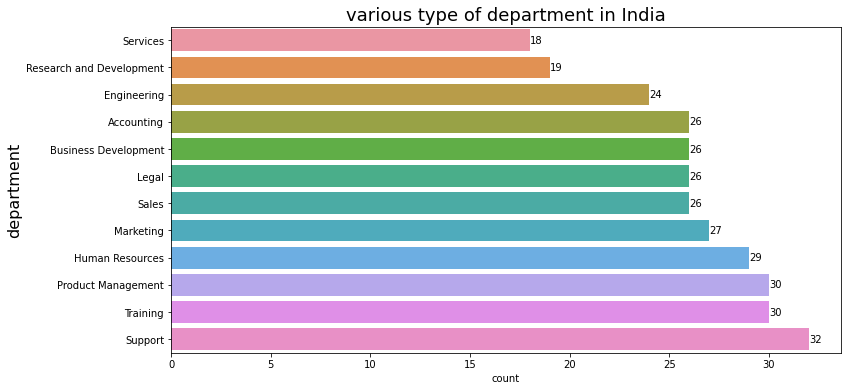

In [84]:
plt.figure(figsize=(12, 6))
department1 = india['department']
ax=sns.countplot(y= department1 ,data =india,orient='h',order=department1.value_counts().sort_values().index)
plt.title('various type of department in India', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('department', fontsize=16)


In [ ]:
job_grp['gender','country', 'company', 'department', 'job',
       'language', 'skill', 'continent']

In [114]:
india['skill'].value_counts()

RF Troubleshooting    2
MSS                   2
BSI Tax Factory       2
nDo                   2
Ideas Development     2
                     ..
HDS                   0
HDRI                  0
HDR Photography       0
HDPE                  0
zSeries               0
Name: skill, Length: 5976, dtype: int64

In [109]:
india['skill'].nunique()

308

In [122]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 31498 to 46396
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gender      2 non-null      category
 1   email       2 non-null      object  
 2   city        2 non-null      object  
 3   country     2 non-null      object  
 4   company     2 non-null      object  
 5   department  2 non-null      category
 6   job         2 non-null      category
 7   language    2 non-null      category
 8   university  2 non-null      object  
 9   skill       2 non-null      category
 10  name        2 non-null      object  
 11  continent   2 non-null      object  
dtypes: category(5), object(7)
memory usage: 185.0+ KB


### China

In [126]:
china.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9343 entries, 3 to 50999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gender      9343 non-null   category
 1   email       9343 non-null   object  
 2   city        9343 non-null   object  
 3   country     9343 non-null   object  
 4   company     9343 non-null   object  
 5   department  9343 non-null   category
 6   job         9343 non-null   category
 7   language    9343 non-null   category
 8   university  9343 non-null   object  
 9   skill       9343 non-null   category
 10  name        9343 non-null   object  
 11  continent   9343 non-null   object  
dtypes: category(5), object(7)
memory usage: 832.7+ KB


In [129]:
china['company'].value_counts().head(30)

Meevee          62
Livetube        57
Quinu           52
Jayo            52
Quatz           50
Photobug        50
Wikizz          47
Mynte           47
Thoughtstorm    46
Dynabox         46
Skimia          45
Voomm           45
Realcube        44
Jabbersphere    43
Youspan         42
Katz            40
Shufflebeat     37
Shufflester     36
Photojam        35
Yombu           35
Linkbridge      34
Yoveo           34
Abata           34
Blogtags        34
Devcast         34
Gigabox         33
Shuffletag      33
Twitterwire     33
Voonix          32
Babbleopia      32
Name: company, dtype: int64

In [130]:
china['job'].value_counts().head(30)

Clinical Specialist                     109
General Manager                         101
Graphic Designer                        100
Food Chemist                            100
Business Systems Development Analyst     99
VP Accounting                            96
Analyst Programmer                       95
Help Desk Technician                     95
Social Worker                            94
Desktop Support Technician               94
Occupational Therapist                   94
Associate Professor                      93
Marketing Assistant                      93
Speech Pathologist                       93
Senior Cost Accountant                   92
Assistant Manager                        92
Structural Analysis Engineer             92
Teacher                                  92
Senior Developer                         91
Staff Scientist                          91
Chemical Engineer                        91
Operator                                 90
Sales Associate                 

<AxesSubplot:>

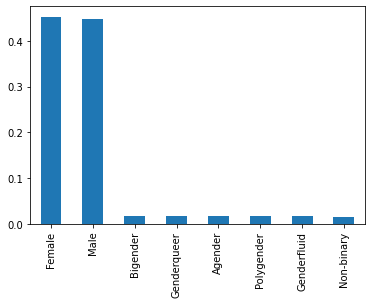

In [153]:
china['gender'].value_counts(normalize=True).head(10).plot(kind='bar')

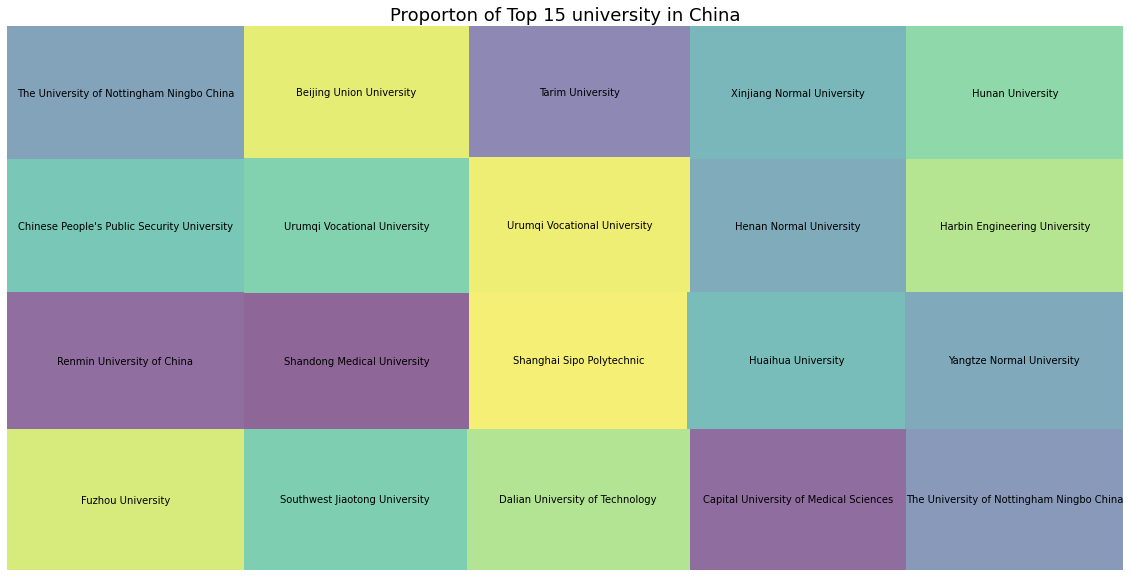

In [150]:
plt.figure(figsize=(20, 10))
sizes1 = china['university'].value_counts()[:20]
squarify.plot(sizes=sizes1, label=china['university'], alpha=0.6)
plt.title('Proporton of Top 15 university in China', fontsize=18)
plt.axis('off')
plt.show()

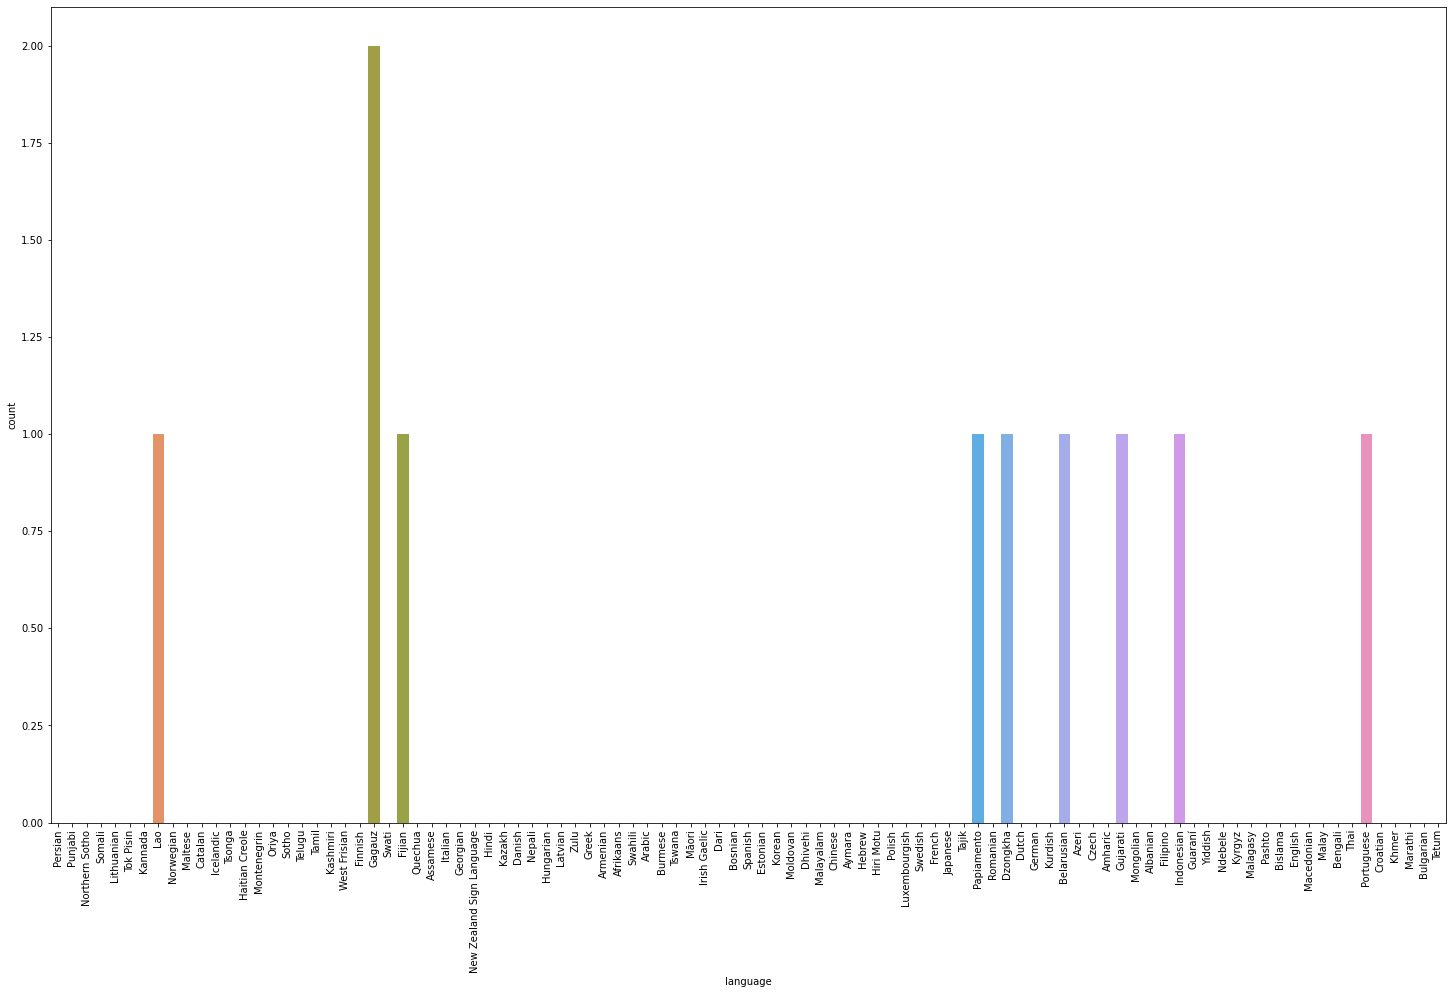

In [149]:
language= data['language']
plt.figure(figsize=(25, 15))
sns.countplot(x=data['language'][:10],order=language.value_counts().sort_values().index)
plt.xticks(rotation=90)
plt.show()

In [131]:
from wordcloud import WordCloud, STOPWORDS

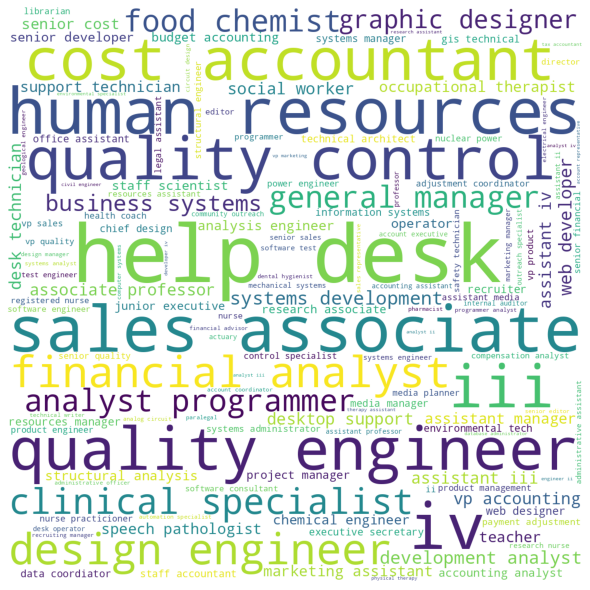

In [133]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in china.job:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
